Saving car data.csv to car data.csv
Results for Linear Regression:
Mean Absolute Error (MAE): 1.2163740193330348
Mean Squared Error (MSE): 3.481349830511816
R² Score: 0.8488707839193155
First 10 Predicted vs Actual Values:
   Actual  Predicted
0    0.35   2.954337
1   10.11   8.177163
2    4.95   6.456123
3    0.15  -1.423372
4    6.95   9.088647
5    7.45   7.417936
6    1.10   1.335139
7    0.50   0.840323
8    0.45   1.363202
9    6.00   7.490678


Results for Decision Tree:
Mean Absolute Error (MAE): 0.7334426229508197
Mean Squared Error (MSE): 1.255960655737705
R² Score: 0.9454773698218325
First 10 Predicted vs Actual Values:
   Actual  Predicted
0    0.35       0.50
1   10.11      11.25
2    4.95       4.10
3    0.15       0.20
4    6.95       7.05
5    7.45       5.95
6    1.10       1.11
7    0.50       0.50
8    0.45       0.50
9    6.00       7.20


Results for Random Forest:
Mean Absolute Error (MAE): 0.6392016393442627
Mean Squared Error (MSE): 0.9442812640983598
R² Score: 

<ipython-input-1-9051909cbfd4>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R² Score", palette="viridis")


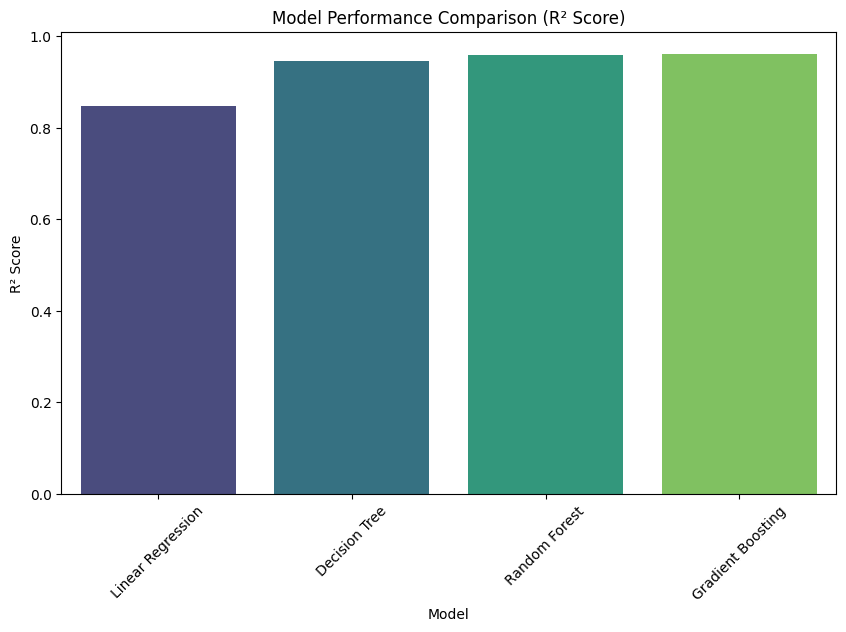

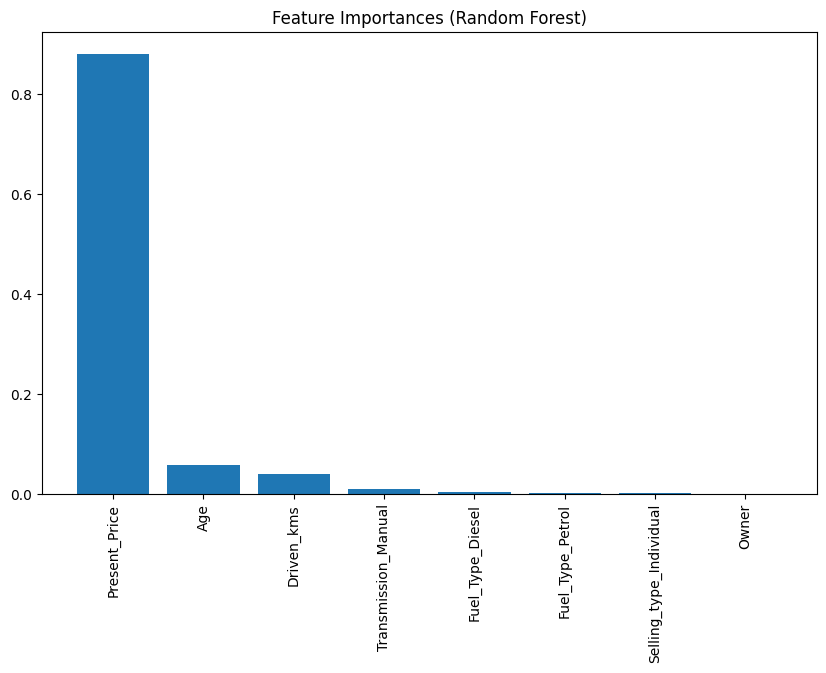

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Make sure to upload 'car data.csv' in Colab)
from google.colab import files
uploaded = files.upload()
car_data = pd.read_csv(list(uploaded.keys())[0])

# Data preprocessing
car_data['Age'] = 2024 - car_data['Year']  # Create a new column for car age
car_data = car_data.drop(columns=['Car_Name', 'Year'])  # Drop unnecessary columns

# One-hot encode categorical columns
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Drop first to avoid dummy variable trap
encoded_cats = pd.DataFrame(encoder.fit_transform(car_data[categorical_cols]),
                            columns=encoder.get_feature_names_out(categorical_cols))
# Combine numerical and encoded categorical data
numerical_cols = car_data.drop(columns=categorical_cols)
processed_data = pd.concat([numerical_cols, encoded_cats], axis=1)

# Split into features and target variable
X = processed_data.drop(columns=['Selling_Price'])
y = processed_data['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": model_name, "MAE": mae, "MSE": mse, "R² Score": r2})

    # Display results for this model
    print(f"Results for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    print(f"First 10 Predicted vs Actual Values:")
    print(pd.DataFrame({"Actual": y_test.values[:10], "Predicted": y_pred[:10]}))
    print("\n")

# Create a DataFrame to compare model performance
results_df = pd.DataFrame(results)

# Display summary table
print("Model Performance Summary:")
print(results_df)

# Visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="R² Score", palette="viridis")
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Feature importance (Random Forest example)
best_model = models["Random Forest"]
feature_importances = best_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), features[sorted_indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()